# 인공신경망 활용하기



## 실습 목표
-----
- torchvision 데이터 셋을 사용하여 이미지 분류기를 생성한다.
- 생성한 모델을 저장하고, 저장된 모델을 다시 불러와서 사용한다.




## 문제 정의
-----
- pytorch를 사용하여 기본적인 인공신경망을 생성하여 이미지 분류기를 생성합니다.
- 데이터셋: [Fashion MNIST](https://pytorch.org/vision/0.9/datasets.html#fashion-mnist)

- **reference**
    - https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html
    - https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

## 주요 개념 리뷰
----

### 1. TensorDataset과 DataLoader

- 입력 데이터를 쉽게 처리하고, 배치 단위로 잘러서 학습할 수 있게 도와주는 모듈
- **Dataset** : 학습시 사용하는 feature와 target의 pair로 이루어짐

- **DataLoader**: 학습 시 각 인스턴스에 쉽게 접근할 수 있도록 순회 가능한 객체(iterable)를 생성

- **DataLoader가 하는 역할**
    - shuffling
    - batch ...

### 2. Device 설정
- 일반적으로 인공신경망의 학습은 (가능하다면) GPU를 사용하는 것이 바람직함
- GPU를 사용하여 학습을 진행하도록 명시적으로 작성 필요
- 연산 유형에 따라 GPU에서 수행이 불가능한 경우도 존재하는데, 그럴 경우도 마찬가지로 명시적으로 어떤 프로세서에서 연산을 수행해야하는지 코드로 작성해야함


### 3. 신경망 생성

- **torch.nn 패키지**는 신경망 생성 및 학습 시 설정해야하는 다양한 기능을 제공
- 신경망을 **nn.Module**을 상속받아 정의
    - __ __init__ __(): 신경망에서 사용할 layer를 초기화하는 부분
    - __forward()__: feed foward 연산 수행 시, 각 layer의 입출력이 어떻게 연결되는지를 지정


### 4. Model compile

- 학습 시 필요한 정보들(loss function, optimizer)을 선언
- 일반적으로 loss와 optimizer는 아래와 같이 변수로 선언하고, 변수를 train/test 시 참고할 수 있도록 매개변수로 지정해줌


### 5. Train
- **신경망의 학습과정**을 별도의 함수로 구성하는 것이 일반적
    - feed forward -> loss -> error back propagation -> (log) -> (반복)

### 6. Test

- 학습과정과 비슷하나 error back propagate하는 부분이 없음
    - feed forward -> loss ->  (log) -> (반복)

### 7. Iteration
- 신경망 학습은 여러 epochs을 반복해서 수행하면서 모델을 구성하는 최적의 파라미터를 찾음
- 지정한 epochs 수만큼 **학습**과정과 **평가**과정을 반복하면서, 모델의 성능(loss, accuracy 등)을 체크함

## 주요 코드
----

## Fashion MNIST Classifier
----
Fashion MNIST 데이터셋을 사용하여 옷의 품목을 구분하는 분류기를 신경망을 사용하여 구현해봅니다.

### [Step1] Load libraries & Datasets

* **[torch.nn](https://pytorch.org/docs/stable/nn.html)** :  신경망을 생성하기 위한 기본 재료들을 제공(Modules, Sequential, Layer, Activations, Loss, Dropout...)
* **[torchvision.datasets](https://pytorch.org/vision/0.9/datasets.html#fashion-mnist)** : torchvision.transforms를 사용해 변형이 가능한 형태, feature와 label을 반환
* **[torchvision.transforms](https://tutorials.pytorch.kr/beginner/basics/transforms_tutorial.html)**
    * ToTensor() : ndarray를 FloatTensor로 변환하고 이미지 픽셀 크기를 [0., 1.]범위로 조정(scale)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torch import nn

from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
# FashionMNIST 데이터 불러오기
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
)

100%|██████████| 26421880/26421880 [00:02<00:00, 9765751.55it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 171442.53it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3186965.71it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5788814.21it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



### [Step2] Create DataLoader

In [3]:
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = False)

In [4]:
# Device 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'device = {device}')

device = cuda


#### EDA

In [5]:
print(training_data, '\n------------------\n', test_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() 
------------------
 Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [6]:
training_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
# 맨 앞의 수는 위에서 설정한 배치수(batch size)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


label=9


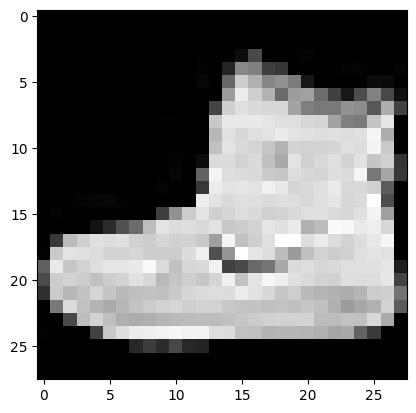

In [8]:
img, label = training_data[0]
plt.imshow(img.squeeze(), cmap='gray')
print(f'label={label}')

In [9]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

Ankle Boot
Sneaker
Bag
T-Shirt
T-Shirt
Trouser
T-Shirt
Bag
Coat
Trouser


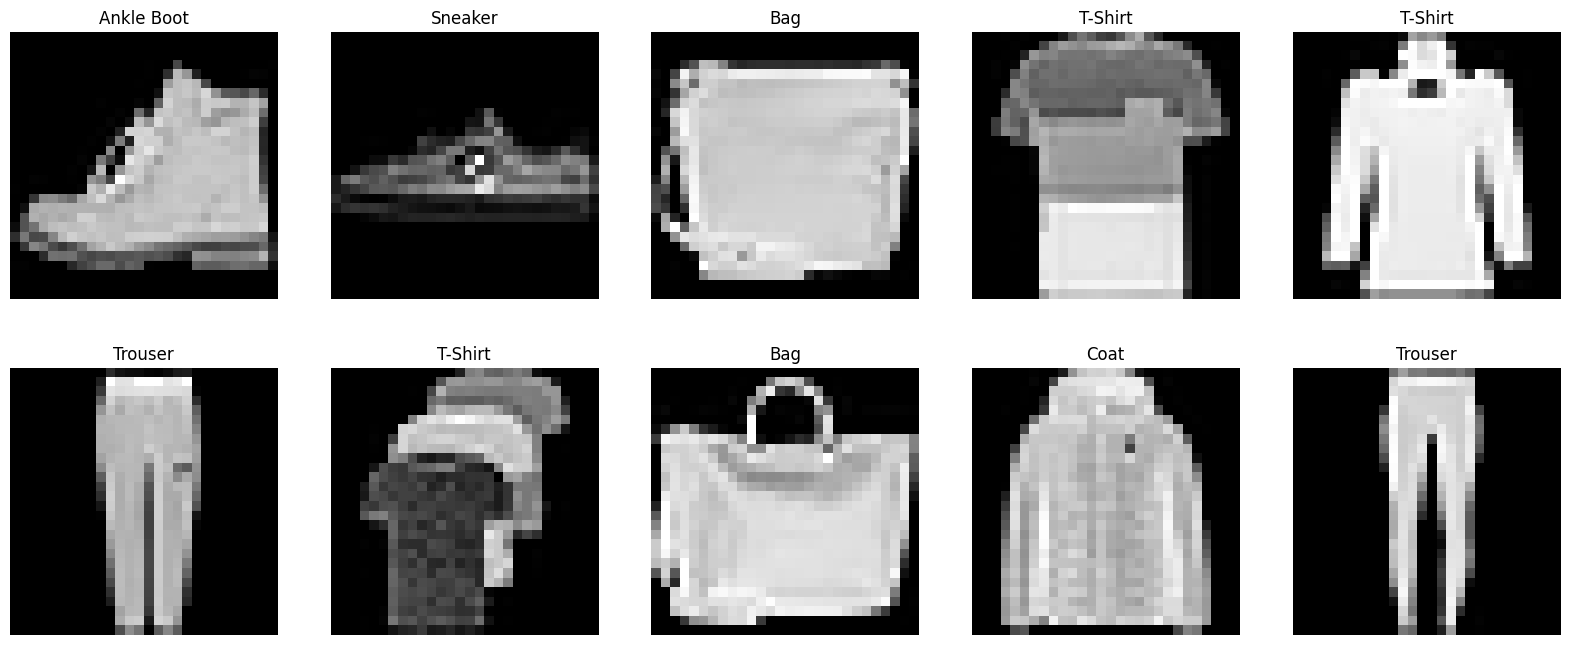

In [10]:
figure = plt.figure(figsize = (20, 8))
cols, rows = 5, 2

for i in range(1, cols * rows +1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    print(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

### [Step3] Set Network Structure

In [11]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        output = self.classifier(x)
        return output

### [Step4] Create Model instance

In [12]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


#### Model 테스트

In [13]:
X = torch.rand(1, 28, 28, device = device)
output = model(X)
print(f'모델 출력 결과: {output}\n')
pred_probab = nn.Softmax(dim=1)(output)
print(f'Softmax 결과: {pred_probab}\n')
y_pred = pred_probab.argmax()
print(y_pred)

모델 출력 결과: tensor([[-1.4709e-01,  1.7883e-01,  1.6473e-03,  1.2679e-01, -9.3729e-02,
         -1.2677e-01, -2.4760e-04, -8.2826e-02, -1.9066e-01, -4.1929e-01]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

Softmax 결과: tensor([[0.0919, 0.1273, 0.1067, 0.1209, 0.0970, 0.0938, 0.1065, 0.0980, 0.0880,
         0.0700]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

tensor(1, device='cuda:0')


### [Step5] Model compile

In [14]:
# Loss
loss = nn.CrossEntropyLoss()
# Optimizer
learning_rate = 1e-3  #0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

### [Step6] Set train loop

In [15]:
def train_loop(train_loader, model, loss_fn, optimizer):
    size = len(train_loader.dataset)

    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
        pred = model(X)

        # 손실 계산
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f'loss: {loss:>7f}  [{current:>5d}]/{size:5d}')

### [Step7] Set test loop

In [16]:
def test_loop(test_loader, model, loss_fn):
    size = len(test_loader.dataset)
    num_batches = len(test_loader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:8f}\n")

### [Step8] Run model

In [17]:
epochs = 10

for i in range(epochs) :
    print(f"Epoch {i+1} \n------------------------")
    train_loop(train_dataloader, model, loss, optimizer)
    test_loop(test_dataloader, model, loss)
print("Done!")

Epoch 1 
------------------------
loss: 2.320355  [    0]/60000
loss: 0.720320  [ 6400]/60000
loss: 0.539223  [12800]/60000
loss: 0.444657  [19200]/60000
loss: 0.419562  [25600]/60000
loss: 0.476734  [32000]/60000
loss: 0.444991  [38400]/60000
loss: 0.288336  [44800]/60000
loss: 0.617756  [51200]/60000
loss: 0.456610  [57600]/60000
Test Error: 
 Accuracy: 83.1%, Avg loss: 0.468967

Epoch 2 
------------------------
loss: 0.314934  [    0]/60000
loss: 0.430030  [ 6400]/60000
loss: 0.372467  [12800]/60000
loss: 0.287398  [19200]/60000
loss: 0.416956  [25600]/60000
loss: 0.453101  [32000]/60000
loss: 0.306471  [38400]/60000
loss: 0.316208  [44800]/60000
loss: 0.322070  [51200]/60000
loss: 0.432700  [57600]/60000
Test Error: 
 Accuracy: 84.8%, Avg loss: 0.423573

Epoch 3 
------------------------
loss: 0.395633  [    0]/60000
loss: 0.245405  [ 6400]/60000
loss: 0.454437  [12800]/60000
loss: 0.547448  [19200]/60000
loss: 0.433532  [25600]/60000
loss: 0.298113  [32000]/60000
loss: 0.342468  

### [Step9] Save & load model

#### parameter만 저장하고 불러오기

In [18]:
torch.save(model.state_dict(), 'model_weights.pth')

In [19]:
model2 = NeuralNetwork().to(device)
print(model2)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [20]:
model2.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

In [21]:
model2.eval()
test_loop(test_dataloader, model2, loss)

Test Error: 
 Accuracy: 87.9%, Avg loss: 0.336792



#### Model 전체를 저장하고 불러오기

In [22]:
torch.save(model, 'model.pth')

In [23]:
model3 = torch.load('model.pth')

In [24]:
model3.eval()
test_loop(test_dataloader, model3, loss)

Test Error: 
 Accuracy: 87.9%, Avg loss: 0.336792

